In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for better plots
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully
NumPy version: 2.0.2


# Exercise 2: Matrix Inversion And Eigendecomposition


---

## Part 1: Matrix Inversion

### 1.1: Matrix Inverses

**Definition:**  
The **inverse** of a square matrix $A$ (denoted $A^{-1}$) is a matrix such that:
$$
A A^{-1} = A^{-1} A = I
$$
where $I$ is the identity matrix. Only square, non-singular matrices (with nonzero determinant) have inverses.

**How to compute the inverse in NumPy:**  
You can use `np.linalg.inv()` to compute the inverse of a matrix.

In [2]:
A = np.array([[1, 2], [3, 4]])
A_inv = np.linalg.inv(A)
print("A inverse:\n", A_inv)

# Check: A @ A_inv should be the identity matrix
print("A @ A_inv:\n", A @ A_inv)

A inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]
A @ A_inv:
 [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


### 1.2: Determinant

**Definition:**  
The **determinant** of a square matrix $A$ (denoted $\det(A)$ or $|A|$) is a scalar value that can be computed from its elements and encodes important properties such as invertibility.

#### Rule of Sarrus

- For a $2 \times 2$ matrix:
  $$
  A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}, \quad \det(A) = ad - bc
  $$

- For a $3 \times 3$ matrix:
  $$
  A = \begin{bmatrix}
  a & b & c \\
  d & e & f \\
  g & h & i
  \end{bmatrix}
  $$
  $$
  \det(A) = aei + bfg + cdh - ceg - bdi - afh
  $$

#### Task

- Compute the determinant using NumPy and implement a function to compute it from scratch using the Rule of Sarrus for $2 \times 2$ and $3 \times 3$ matrices.

In [8]:
# Example matrices
A2 = np.array([[1, 2], [3, 4]])
A3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# From scratch
def sarrus_det(A):
    if len(A) == 2:
      return A[0][0]*A[1][1] - A[0][1]*A[1][0]
    else:
      return A[0][0]*A[1][1]*A[2][2] + A[0][1]*A[1][2]*A[2][0] + A[0][2]*A[1][0]*A[2][1] - A[0][2]*A[1][1]*A[2][0] - A[0][1]*A[1][0]*A[2][2] - A[0][0]*A[1][2]*A[2][1]
    pass

print("Determinant of A2 (Sarrus):", sarrus_det(A2))
print("Determinant of A3 (Sarrus):", sarrus_det(A3))

# Using NumPy
print("Determinant of A2 (NumPy):", np.linalg.det(A2))
print("Determinant of A3 (NumPy):", np.linalg.det(A3))

Determinant of A2 (Sarrus): -2
Determinant of A3 (Sarrus): 0
Determinant of A2 (NumPy): -2.0000000000000004
Determinant of A3 (NumPy): 0.0


### 1.3: Solving Systems Of Linear Equations

**Definition:**  
A system of linear equations can be written in matrix form as $A\mathbf{x} = \mathbf{b}$, where $A$ is a square matrix of coefficients, $\mathbf{x}$ is the vector of unknowns, and $\mathbf{b}$ is the vector of constants.

If $A$ is invertible (i.e., $\det(A) \neq 0$), the solution is:
$$
\mathbf{x} = A^{-1} \mathbf{b}
$$

- **Task:**  
Consider the following system of linear equations:
$$
\begin{cases}
2x + y = 1 \\
5x + 3y = 2
\end{cases}
$$
Write code to solve this system using matrix inverses.  
Does this system have a solution? What is the solution?  
What happens if the determinant of $A$ is zero? Try changing the matrix to make it singular and observe the result.

In [11]:
A = [[2, 1], [5, 3]]
b = [1, 2]

# TODO: Solve the system using the inverse of A
x = np.linalg.inv(A) @ b

print("Solution x:", x)
print("Determinant of A:", np.linalg.det(A)) # TODO: Compute the determinant of A

Solution x: [ 1. -1.]
Determinant of A: 1.0000000000000009


## Part 2: Eigendecomposition

### 2.1: Eigenvalues and Eigenvectors

**Definition:**  
Given a square matrix $A$, a nonzero vector $v$ is called an **eigenvector** of $A$ if there exists a scalar $\lambda$ (the **eigenvalue**) such that:
$$
A v = \lambda v
$$

- **Task:**  
Use NumPy to compute the eigenvalues and eigenvectors of a matrix.

In [20]:
A = np.array([[4, 2], [1, 3]])

# TODO: Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(A)  # Hint: Use np.linalg.eig

print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)

# TODO: Fill in the code to verify the property of the first eigenvectors and eigen values
print("Ax :", A @ eigvecs[:, 0])
print("eigenvalue1 :", eigvals[0])
print("eigenvalue1.x :", np.multiply(eigvals[0], eigvecs[:, 0]))

Eigenvalues: [5. 2.]
Eigenvectors:
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
Ax : [4.47213595 2.23606798]
eigenvalue1 : 5.0
eigenvalue1.x : [4.47213595 2.23606798]


Below is a visualization of Eigenvalues and Eigenvectors, showing that when a matrix $A$ acts on its eigenvector $v$, the result is a scaled version of $v$ (i.e., $A v = \lambda v$). This means the direction of the eigenvector does not change under the transformation by $A$—only its magnitude is scaled by the corresponding eigenvalue $\lambda$.

Eigenvalues: [5. 2.]
Eigenvectors:
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


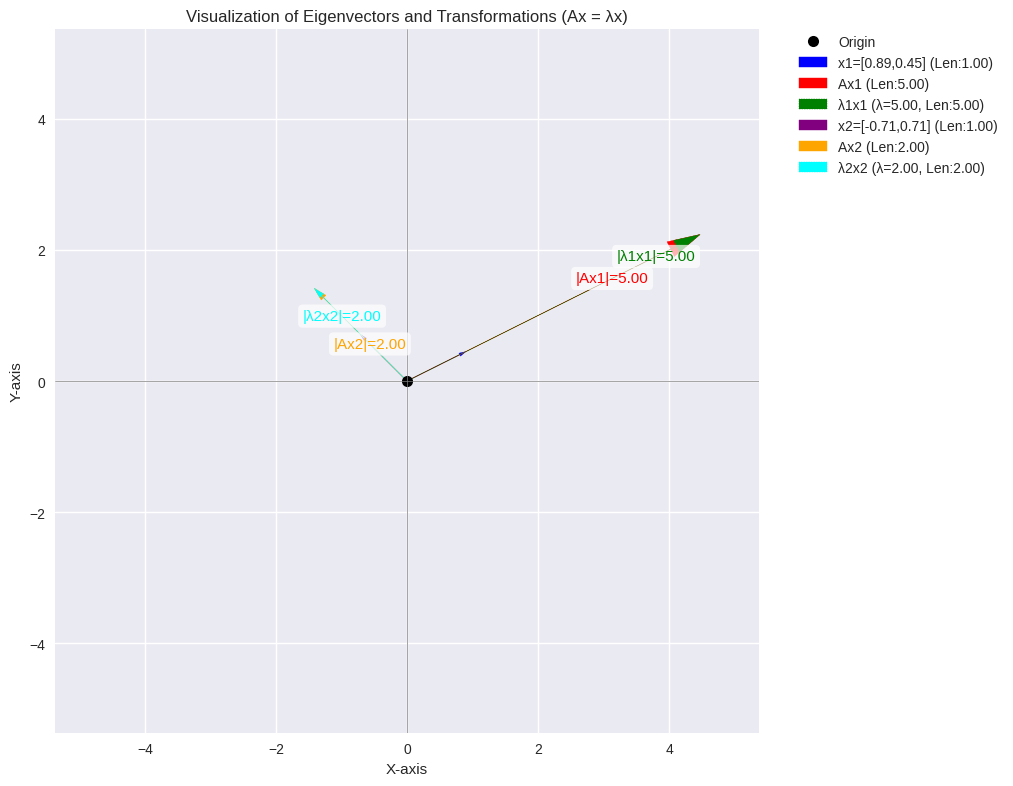

In [21]:
# Define the matrix A
A = np.array([[4, 2], [1, 3]])

# Calculate eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(A)

print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)

# Create a single figure and axes for visualization
fig, ax = plt.subplots(1, 1)

# Plot origin
ax.plot(0, 0, 'o', color='black', markersize=8, label='Origin')

# Define distinct colors for each eigenvector's components
# Set 1 for Eigenvector 1: Original (blue), Ax (red), Lambda*x (green)
# Set 2 for Eigenvector 2: Original (purple), Ax (orange), Lambda*x (cyan)
colors_x = ['blue', 'purple']
colors_Ax = ['red', 'orange']
colors_lambda_x = ['green', 'cyan']

all_vectors = [] # To keep track of all vector coordinates for setting limits

for i in range(len(eigvals)):
    eigenvalue = eigvals[i]
    eigenvector = eigvecs[:, i]

    # Calculate Ax
    Ax = np.dot(A, eigenvector)

    # Calculate lambda * x
    lambda_x = eigenvalue * eigenvector

    # Store all vector coordinates for global limits
    all_vectors.extend([eigenvector, Ax, lambda_x])

    # Calculate lengths
    len_x = np.linalg.norm(eigenvector)
    len_Ax = np.linalg.norm(Ax)
    len_lambda_x = np.linalg.norm(lambda_x)

    # Define head_width and head_length as a fraction of vector magnitude for consistent sizing
    # Calculate these inside the loop to be responsive to current vector length or global max_coord
    # For now, let's make it a global fraction to ensure consistency across all vectors
    # This will be refined after calculating max_coord below.
    # For initial arrow sizing, a reasonable fraction of a typical unit vector is chosen.
    base_head_width = 0.05
    base_head_length = 0.1

    # Plot original eigenvector (x) using ax.arrow
    ax.arrow(0, 0, eigenvector[0], eigenvector[1],
             head_width=base_head_width * len_x, head_length=base_head_length * len_x,
             fc=colors_x[i], ec=colors_x[i], width=0.002, length_includes_head=True,
             label=f'x{i+1}=[{eigenvector[0]:.2f},{eigenvector[1]:.2f}] (Len:{len_x:.2f})')

    # Plot Ax using ax.arrow
    ax.arrow(0, 0, Ax[0], Ax[1],
             head_width=base_head_width * len_Ax, head_length=base_head_length * len_Ax,
             fc=colors_Ax[i], ec=colors_Ax[i], width=0.002, length_includes_head=True,
             label=f'Ax{i+1} (Len:{len_Ax:.2f})')

    # Plot lambda*x using ax.arrow (with dashed linestyle)
    ax.arrow(0, 0, lambda_x[0], lambda_x[1],
             head_width=base_head_width * len_lambda_x * 0.8, head_length=base_head_length * len_lambda_x * 0.8, # Slightly smaller head for dashed
             fc=colors_lambda_x[i], ec=colors_lambda_x[i], width=0.0015, length_includes_head=True,
             linestyle=(0, (4, 2)), # Standard dash pattern
             label=f'λ{i+1}x{i+1} (λ={eigenvalue:.2f}, Len:{len_lambda_x:.2f})')

    # Add text annotations for lengths
    # Adjust position slightly to avoid overlap
    text_offset_Ax = 0.7 if i == 0 else 0.4
    text_offset_lambda_x = 0.85 if i == 0 else 0.7

    ax.text(Ax[0] * text_offset_Ax, Ax[1] * text_offset_Ax, f'|Ax{i+1}|={len_Ax:.2f}', color=colors_Ax[i], ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    ax.text(lambda_x[0] * text_offset_lambda_x, lambda_x[1] * text_offset_lambda_x, f'|λ{i+1}x{i+1}|={len_lambda_x:.2f}', color=colors_lambda_x[i], ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Visualization of Eigenvectors and Transformations (Ax = λx)')
ax.grid(True)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # Move legend outside to prevent overlap

# Adjust limits to fit all vectors comfortably
# Flatten all_vectors to ensure it's a 1D array for np.max calculation
all_vectors_array_flat = np.array(all_vectors).flatten()
max_coord = np.max(np.abs(all_vectors_array_flat)) * 1.2
ax.set_xlim([-max_coord, max_coord])
ax.set_ylim([-max_coord, max_coord])


plt.tight_layout()
plt.savefig('all_eigenvectors_single_plot_transformation_arrow.png')
plt.show()

## 2.2: Eigendecomposition

**Definition:**  
If $A$ is a square matrix with $n$ linearly independent eigenvectors, it can be decomposed as:
$$
A = P D P^{-1}
$$
where $P$ is the matrix of eigenvectors and $D$ is the diagonal matrix of eigenvalues.

- **Task:**  
Use NumPy to compute the eigendecomposition of a matrix and verify that $A = P D P^{-1}$.  
Additionally, for a vector $v$, fill in the code to show the following steps:
1. Change $v$ to the eigenbasis: $v' = P^{-1} v$
2. Scale in the eigenbasis: $D v'$
3. Transform back to the original basis: $P D P^{-1} v$
4. Compare $A v$ and $P D P^{-1} v$ to confirm they are the same.

This demonstrates that in the eigenbasis, $A$ simply scales each component by its corresponding eigenvalue, and the eigenvectors become the basis vectors.

In [23]:
A = np.array([[4, 2], [1, 3]])
eigvals, eigvecs = np.linalg.eig(A)
P = eigvecs
D = np.diag(eigvals)
PP = np.linalg.inv(P)

# TODO: Reconstruct A from its eigendecomposition
A_reconstructed = P @ D @ PP
print("A reconstructed:\n", A_reconstructed)
print("Is reconstruction close to original?", np.allclose(A, A_reconstructed))

# Pick a random vector v
v = np.array([1, 1])
print("\nOriginal vector v:", v)


v_eigenbasis = PP @ v
print("v in eigenbasis (P^-1 v):", v_eigenbasis)


scaled_eigenbasis = D @ v_eigenbasis
print("Scaled in eigenbasis (D P^-1 v):", scaled_eigenbasis)


transformed_v = A_reconstructed @ v
print("Transformed back (P D P^-1 v):", transformed_v)

# TODO 4. Compare P D P^-1 v with A v
print("A v:", A @ v)
print("P D P^-1 v: ", A_reconstructed @ v)
print("Are A v and P D P^-1 v equal?", np.allclose(A @ v, A_reconstructed @ v)) # Hint: use np.allclose

A reconstructed:
 [[4. 2.]
 [1. 3.]]
Is reconstruction close to original? True

Original vector v: [1 1]
v in eigenbasis (P^-1 v): [1.49071198 0.47140452]
Scaled in eigenbasis (D P^-1 v): [7.45355992 0.94280904]
Transformed back (P D P^-1 v): [6. 4.]
A v: [6 4]
P D P^-1 v:  [6. 4.]
Are A v and P D P^-1 v equal? True


Now let's visualize why the eigenvectors are scaled when multiplied by $A$, by going through each step: changing to the eigenbasis ($P^{-1}v$), scaling by the eigenvalues ($D P^{-1}v$), and transforming back to the original basis ($P D P^{-1}v$). This process shows that in the eigenbasis, $A$ simply stretches or shrinks each component by its corresponding eigenvalue, and the eigenvectors become the basis vectors.

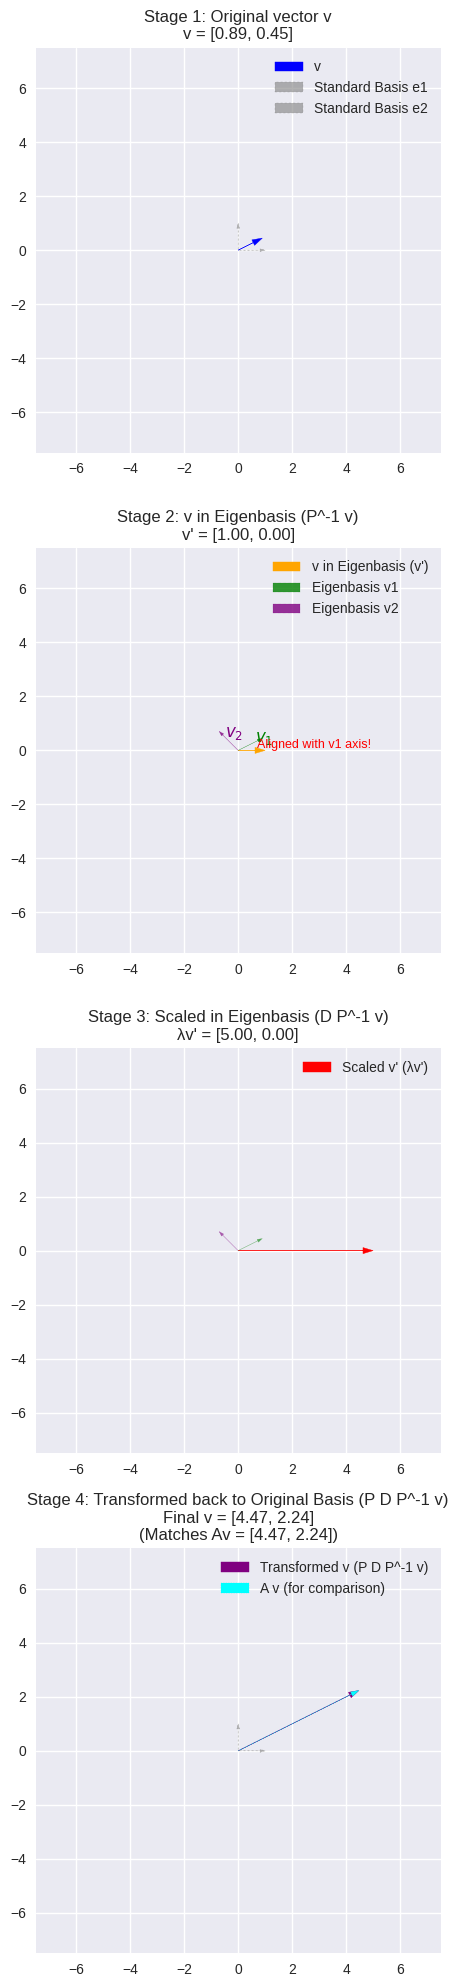

In [24]:
# Define the matrix A
A = np.array([[4, 2], [1, 3]])

# Perform eigendecomposition
eigvals, eigvecs = np.linalg.eig(A)
P = eigvecs  # P is the matrix of eigenvectors
D = np.diag(eigvals) # D is the diagonal matrix of eigenvalues

# Reconstruct A from its eigendecomposition
A_reconstructed = P @ D @ np.linalg.inv(P)

# Pick an eigenvector as vector v for clear visualization
# Let's pick the first eigenvector
v = eigvecs[:, 0] # Make v the first eigenvector
corresponding_eigenvalue = eigvals[0]

# --- Transformation Stages ---

# Stage 1: Change to eigenbasis (P^-1 v)
v_eigenbasis = np.linalg.inv(P) @ v

# Stage 2: Scale in eigenbasis (D P^-1 v)
scaled_eigenbasis = D @ v_eigenbasis

# Stage 3: Transform back to original basis (P D P^-1 v)
transformed_v = P @ scaled_eigenbasis

# Compare with A v
Av = A @ v

# --- Visualization ---

fig, axs = plt.subplots(4, 1, figsize=(8, 20)) # 4 rows, 1 column for vertical stacking

# Correctly concatenate all vector components for max_limit calculation
# Use .flatten() on eigvecs to make it 1D for concatenation
max_limit = np.max(np.abs(np.concatenate((v, v_eigenbasis, scaled_eigenbasis, transformed_v, eigvecs.flatten())))) * 1.5
global_xlim = [-max_limit, max_limit]
global_ylim = [-max_limit, max_limit]

# Standard basis vectors
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Eigenbasis vectors (columns of P)
eigvec1 = eigvecs[:, 0]
eigvec2 = eigvecs[:, 1]

# Define head_width and head_length as a fraction of max_limit for consistent sizing
head_width = 0.03 * max_limit
head_length = 0.05 * max_limit


# Plot 1: Original vector v in Standard Basis
ax = axs[0]
ax.set_title(f"Stage 1: Original vector v\nv = [{v[0]:.2f}, {v[1]:.2f}]")
ax.arrow(0, 0, v[0], v[1], head_width=head_width, head_length=head_length, fc='blue', ec='blue', width=0.002, length_includes_head=True, label='v')
# Plot standard basis
ax.arrow(0, 0, e1[0], e1[1], head_width=head_width/2, head_length=head_length/2, fc='gray', ec='gray', width=0.001, alpha=0.6, linestyle=(0, (5, 5)), length_includes_head=True, label='Standard Basis e1')
ax.arrow(0, 0, e2[0], e2[1], head_width=head_width/2, head_length=head_length/2, fc='gray', ec='gray', width=0.001, alpha=0.6, linestyle=(0, (5, 5)), length_includes_head=True, label='Standard Basis e2')
ax.set_xlim(global_xlim)
ax.set_ylim(global_ylim)
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
ax.legend()


# Plot 2: v in Eigenbasis (P^-1 v)
ax = axs[1]
ax.set_title(f"Stage 2: v in Eigenbasis (P^-1 v)\nv' = [{v_eigenbasis[0]:.2f}, {v_eigenbasis[1]:.2f}]")
ax.arrow(0, 0, v_eigenbasis[0], v_eigenbasis[1], head_width=head_width, head_length=head_length, fc='orange', ec='orange', width=0.002, length_includes_head=True, label="v in Eigenbasis (v')")
# Plot eigenbasis vectors
ax.arrow(0, 0, eigvec1[0], eigvec1[1], head_width=head_width/2, head_length=head_length/2, fc='green', ec='green', width=0.001, alpha=0.8, linestyle=(0, (1, 1)), length_includes_head=True, label='Eigenbasis v1')
ax.arrow(0, 0, eigvec2[0], eigvec2[1], head_width=head_width/2, head_length=head_length/2, fc='purple', ec='purple', width=0.001, alpha=0.8, linestyle=(0, (1, 1)), length_includes_head=True, label='Eigenbasis v2')
ax.text(eigvec1[0]*0.7, eigvec1[1]*0.7, r'$v_1$', color='green', fontsize=12)
ax.text(eigvec2[0]*0.7, eigvec2[1]*0.7, r'$v_2$', color='purple', fontsize=12)

# As v is chosen as an eigenvector, v_eigenbasis should align with one of the axes (e.g., [length, 0])
if np.isclose(v_eigenbasis[1], 0): # Check if it aligns with the first eigenbasis vector
    ax.text(v_eigenbasis[0]*0.7, v_eigenbasis[1]*0.7 + 0.1, f'Aligned with v1 axis!', color='red', fontsize=9)
elif np.isclose(v_eigenbasis[0], 0): # Check if it aligns with the second eigenbasis vector
    ax.text(v_eigenbasis[0]*0.7 + 0.1, v_eigenbasis[1]*0.7, f'Aligned with v2 axis!', color='red', fontsize=9)

ax.set_xlim(global_xlim)
ax.set_ylim(global_ylim)
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
ax.legend()


# Plot 3: Scaled in Eigenbasis (D P^-1 v)
ax = axs[2]
ax.set_title(f"Stage 3: Scaled in Eigenbasis (D P^-1 v)\nλv' = [{scaled_eigenbasis[0]:.2f}, {scaled_eigenbasis[1]:.2f}]")
ax.arrow(0, 0, scaled_eigenbasis[0], scaled_eigenbasis[1], head_width=head_width, head_length=head_length, fc='red', ec='red', width=0.002, length_includes_head=True, label="Scaled v' (λv')")
# Plot eigenbasis vectors again
ax.arrow(0, 0, eigvec1[0], eigvec1[1], head_width=head_width/2, head_length=head_length/2, fc='green', ec='green', width=0.001, alpha=0.6, linestyle=(0, (1, 1)), length_includes_head=True)
ax.arrow(0, 0, eigvec2[0], eigvec2[1], head_width=head_width/2, head_length=head_length/2, fc='purple', ec='purple', width=0.001, alpha=0.6, linestyle=(0, (1, 1)), length_includes_head=True)
ax.set_xlim(global_xlim)
ax.set_ylim(global_ylim)
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
ax.legend()


# Plot 4: Transformed back to Original Basis (P D P^-1 v) vs Av
ax = axs[3]
ax.set_title(f"Stage 4: Transformed back to Original Basis (P D P^-1 v)\nFinal v = [{transformed_v[0]:.2f}, {transformed_v[1]:.2f}]\n(Matches Av = [{Av[0]:.2f}, {Av[1]:.2f}])")
ax.arrow(0, 0, transformed_v[0], transformed_v[1], head_width=head_width, head_length=head_length, fc='purple', ec='purple', width=0.002, length_includes_head=True, label='Transformed v (P D P^-1 v)')
# Plot Av to show they are the same
ax.arrow(0, 0, Av[0], Av[1], head_width=head_width*0.8, head_length=head_length*0.8, fc='cyan', ec='cyan', width=0.001, linestyle=(0, (2, 2)), length_includes_head=True, label='A v (for comparison)')
# Plot standard basis
ax.arrow(0, 0, e1[0], e1[1], head_width=head_width/2, head_length=head_length/2, fc='gray', ec='gray', width=0.001, alpha=0.6, linestyle=(0, (5, 5)), length_includes_head=True)
ax.arrow(0, 0, e2[0], e2[1], head_width=head_width/2, head_length=head_length/2, fc='gray', ec='gray', width=0.001, alpha=0.6, linestyle=(0, (5, 5)), length_includes_head=True)
ax.set_xlim(global_xlim)
ax.set_ylim(global_ylim)
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
ax.legend()


plt.tight_layout()
plt.savefig('eigendecomposition_transformation_stages_arrow.png')
plt.show()

## 2.3: Singular Value Decomposition (SVD)

**Definition:**  
Singular Value Decomposition (SVD) is a factorization of a real or complex matrix. For any $m \times n$ matrix $A$, SVD is given by:
$$
A = U \Sigma V^T
$$
where:
- $U$ is an $m \times m$ orthogonal matrix (columns are called left singular vectors),
- $\Sigma$ is an $m \times n$ diagonal matrix with non-negative real numbers on the diagonal (the singular values),
- $V$ is an $n \times n$ orthogonal matrix (columns are called right singular vectors).

SVD is a powerful tool in linear algebra and is used in applications such as dimensionality reduction, signal processing, and solving linear systems.

- **Task:**  
Use NumPy to compute the SVD of a matrix and verify the decomposition.  
**Additionally, verify that the singular values are the square roots of the eigenvalues of $A^T A$.**

In [37]:
A = np.array([[4, 2], [1, 3]])
U, S, VT = np.linalg.svd(A)

print("U:\n", U)
print("Singular values (S):", S)
print("V^T:\n", VT)

# TODO: Reconstruct A from its SVD. Hint: use zeros_like and fill_diagonal to create Sigma Matrix
Sigma = np.zeros_like(A, float)
np.fill_diagonal(Sigma, S)
A_reconstructed = U @ Sigma @ VT

print("A reconstructed from SVD:\n", A_reconstructed)
print("Is reconstruction close to original?", np.allclose(A, A_reconstructed))

# TODO: Verify singular values are the square roots of the eigenvalues of A^T A
eigenvalues = np.linalg.eigvals(A)
print("Eigenvalues of A^T A:", eigenvalues)
print("Square roots of eigenvalues:", np.sqrt(eigenvalues))
print("Singular values from SVD:", S)

U:
 [[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]
Singular values (S): [5.11667274 1.95439508]
V^T:
 [[-0.76775173 -0.64074744]
 [-0.64074744  0.76775173]]
A reconstructed from SVD:
 [[4. 2.]
 [1. 3.]]
Is reconstruction close to original? True
Eigenvalues of A^T A: [5. 2.]
Square roots of eigenvalues: [2.23606798 1.41421356]
Singular values from SVD: [5.11667274 1.95439508]


## Part 3: Matrix Norms

### 3.1: Frobenius Norm

**Definition:**  
The **Frobenius norm** of a matrix $A$ is a measure of the "size" of the matrix, defined as the square root of the sum of the absolute squares of its elements:
$$
\|A\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2}
$$

- **Task:**  
Use NumPy to compute the Frobenius norm of a matrix.  
Also, implement the Frobenius norm from scratch using a loop, and compare your result with NumPy's.

In [40]:
A = np.array([[4, 2], [1, 3]])

# TODO: Compute the Frobenius norm using NumPy
fro_norm_numpy = np.linalg.norm(A)
print("Frobenius norm (NumPy):", fro_norm_numpy)

# TODO: Compute the Frobenius norm from scratch
fro_norm_manual = np.sqrt(np.sum(np.exp2(A)))
print("Frobenius norm (manual):", fro_norm_manual)

# Check if both results are close
print("Are the results equal?", np.allclose(fro_norm_manual, fro_norm_numpy))

Frobenius norm (NumPy): 5.477225575051661
Frobenius norm (manual): 5.477225575051661
Are the results equal? True


### 3.2: Schatten Norm

**Definition:**  
The **Schatten $p$-norm** of a matrix $A$ is a generalization of vector $p$-norms to matrices, defined using the singular values of $A$. For $p \geq 1$:
$$
\|A\|_p = \left( \sum_{i=1}^{r} \sigma_i^p \right)^{1/p}
$$
where $\sigma_i$ are the singular values of $A$ and $r$ is the rank of $A$.

- For $p=2$, the Schatten 2-norm is the **Frobenius norm**.
- For $p=1$, the Schatten 1-norm is the **nuclear norm** (sum of singular values).
- For $p=\infty$, the Schatten $\infty$-norm is the **spectral norm** (largest singular value).

- **Task:**  
Compute the Schatten 1-norm (nuclear norm), 2-norm (Frobenius norm), and $\infty$-norm (spectral norm) of a matrix using its singular values.

In [46]:
A = np.array([[4, 2], [1, 3]])
singular_values = np.linalg.svdvals(A)

# TODO: Compute Schatten 1-norm (nuclear norm)
schatten_1 = sum(singular_values)
print("Schatten 1-norm (Nuclear norm):", schatten_1)

# TODO: Compute Schatten 2-norm (Frobenius norm)
schatten_2 = np.linalg.norm(A)
print("Schatten 2-norm (Frobenius norm):", schatten_2)

# TODO: Compute Schatten infinity-norm (Spectral norm)
schatten_inf = np.max(singular_values)
print("Schatten infinity-norm (Spectral norm):", schatten_inf)

Schatten 1-norm (Nuclear norm): 7.0710678118654755
Schatten 2-norm (Frobenius norm): 5.477225575051661
Schatten infinity-norm (Spectral norm): 5.116672736016928
